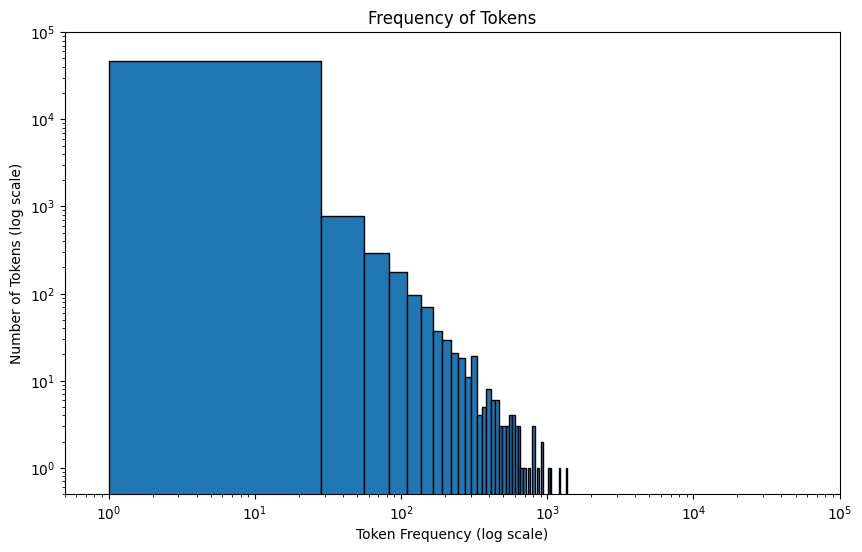

In [ ]:
# Q1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
with open('data/all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)
    
from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()
frequencies = [freq for word, freq in token_freq]

# Histogram
plt.figure(figsize=(10,6))
plt.hist(frequencies, bins=50, edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title('Frequency of Tokens')
plt.xlabel('Token Frequency (log scale)')
plt.ylabel('Number of Tokens (log scale)')
plt.xlim(0.5, 10**5)
plt.ylim(0.5, 10**5)
plt.show()

# Scaled so both axis have a max of 10^5. 
# A small number of words occur very frequently which we see on the right side. It is a heavy right skew with a long tail. After the common occurance words, there is a big drop in the frequencies. 

In [ ]:
# Q2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

file = 'data/Phishing_clean.parquet'
df = pd.read_parquet(file, engine='fastparquet')

df.shape
df.head()

y = df['Email Type']
X = df.drop(columns=['Email Type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)

print("R² Train:", reg.score(X_train, y_train))
print("R² Test:", reg.score(X_test, y_test))

coefs = pd.Series(reg.coef_, index=X.columns)
top_features = coefs.abs().sort_values(ascending=False).head(20)
print(top_features)

# 2. See Output
# 3. The top three most influential words and ones that most strongly influence prediction are intervention, localized, and thermal. Intervention is by far the most influential word based off of aboluste value. These words are the ones which most strongly drive the model's predictability. 

R² Train: 0.7670143724934355
R² Test: 0.6658718438847919
intervention         1.259257
localized            0.824350
thermal              0.747006
crawler              0.696167
background-image:    0.622909
helvetica,           0.598560
aging                0.594956
form.                0.576886
a:active             0.574480
gray;                0.574480
retrieving           0.573761
zdnet                0.560954
{text-decoration:    0.497075
xanaax               0.491981
transcript           0.488978
shopper              0.486678
april's              0.486483
arial,               0.482141
laser                0.473607
issue:               0.465547
dtype: float64


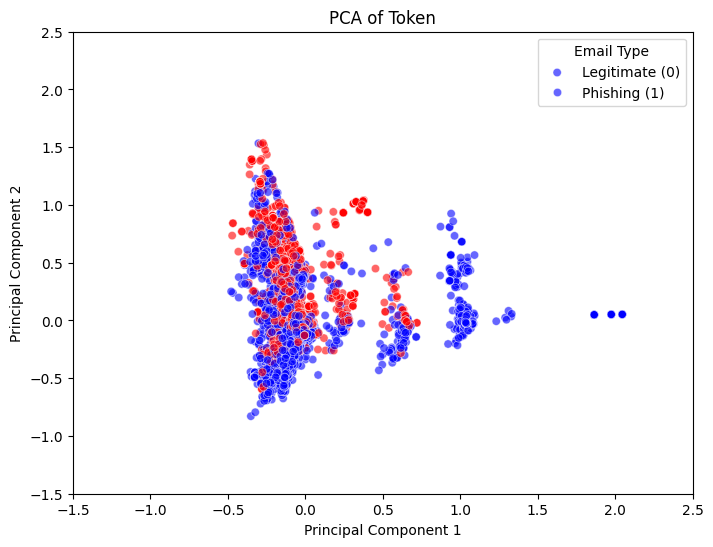

In [ ]:
# Q3

from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(columns=['Email Type'])
y = df['Email Type']

pca = PCA(n_components=2)
Z_mm = pca.fit_transform(X)

pca_df = pd.DataFrame(Z_mm, columns=['PC1', 'PC2'])
pca_df['Email Type'] = y

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Email Type',
    palette={0: 'blue', 1: 'red'},
    alpha=0.6
)

plt.xlim(-1.5, 2.5)
plt.ylim(-1.5, 2.5)

plt.title('PCA of Token')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Email Type', labels=['Legitimate (0)', 'Phishing (1)'])
plt.show()

# Note: My legend is the wrong color and Phising should be in red while Legitimate should be in blue. 
# The Phising emails tend to cluster on one side of the PCA which means you can distinguish from the Legtimate emails. However, there is some overlap between the emails which show there are some common words that are shared between the two because Phising emails will try to imitate legimtimate language. 


In [ ]:
# Q4

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df.drop(columns=['Email Type'])
y = df['Email Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pca = PCA(n_components=2610)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

reg_pca = LinearRegression()
reg_pca.fit(X_train_pca, y_train)

r2_train_pca = reg_pca.score(X_train_pca, y_train)
r2_test_pca = reg_pca.score(X_test_pca, y_test)

print("R² Train (PCA):", r2_train_pca)
print("R² Test (PCA):", r2_test_pca)

# They were nearly identical for Train PCA but a slight increase in Test PCA. This probably means that the excluded portions contained little predictive information that would increase the R^2 for the PCA Train and Test



R² Train (PCA): 0.7662326827745849
R² Test (PCA): 0.6683390643101162


Q5

Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.

Using principal components leads to a regression that is simpler and more stable. PCA only keeps parts of the data that is will help in explaining the variation. This will most likely mean that the data has fewer inputs, which will lead to less correlated variables which will decrease the tendency to overfit. Principal components gives users the ability to have similar performance/ability with cleaner and lower dimensional data.  